# Les techniques avancées de RAG


## Environment variales

In [100]:
## --> Add Necessary env variables here


## Préparation de l'environnement de travail

In [4]:
# Check for GPU
!nvidia-smi

Sun Jun 29 19:49:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   60C    P8             13W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
# General upgrade
!apt-get update -y && apt-get upgrade -y

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,801 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,067 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-sec

In [6]:
# Install Pytorch
!pip install torch

# Instal TensorFlow (colab GPU)
!pip install tensorflow

# Install Hugging Face Transformers, Datasets, et Diffusers
!pip install transformers datasets diffusers accelerate huggingface_hub

# Install langchain, langgraph
!pip install langchain langchain_ollama langchain_community langchain-nomic langgraph langchain_openai langsmith

!pip install ipywidgets tiktoken "nomic[local]" scikit-learn

# Install other utils
!pip install chromadb diskcache

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 6.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 99.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 88.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 118.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 5.4 MB/s eta 0:00

In [7]:
import getpass
import os

if not OPENAI_API_KEY:
 OPENAI_API_KEY = getpass.getpass("Enter API key for OpenAI: ")

from langchain.chat_models import init_chat_model

# Remplacer le MultiQuery par la méthode Step-Back

L’approche Step-Back Prompting est une technique avancée d’ingénierie de prompts visant à améliorer les capacités de raisonnement des modèles de langage (LLMs). Elle encourage le modèle à prendre du recul, à généraliser une question avant de chercher une réponse détaillée, ce qui renforce la cohérence et la pertinence des réponses.

---

## 🏗 Comment fonctionne Step-Back Prompting ?
L’approche repose sur deux étapes clés :

* 1️⃣ Reformulation en question plus générique

Avant de répondre directement à une question spécifique, le modèle reformule cette dernière sous une forme plus générale.
Cela lui permet d’identifier les principes fondamentaux et d’éviter des biais liés à des détails superflus.

* 2️⃣ Utilisation de la reformulation pour guider la réponse finale

Le modèle répond ensuite en tenant compte de cette abstraction, ce qui améliore la clarté et la précision du raisonnement.

---
## 🔍 Exemples concrets
* 🎯 Exemple 1 : Compréhension en histoire

📌 Question originale :

🧐 "Quel a été l'impact économique du blocus de Napoléon sur l’Europe ?"

📌 Reformulation Step-Back :

🔄 "Quels ont été les principaux effets économiques des blocus militaires dans l’histoire ?"

📌 Réponse finale basée sur Step-Back :

✅ En expliquant d’abord comment les blocus économiques influencent généralement les nations, le modèle est mieux préparé pour analyser le cas spécifique du blocus napoléonien.

---

* 🎯 Exemple 2 : Sciences et physique
📌 Question originale :

🧐 "Que se passe-t-il lorsque l'on double la température d’un gaz parfait tout en diminuant son volume de moitié ?"

📌 Reformulation Step-Back :

🔄 "Quels sont les paramètres influençant la pression d’un gaz parfait ?"

📌 Réponse finale basée sur Step-Back :

✅ Le modèle identifie d’abord la loi des gaz parfaits (PV = nRT), puis applique cette connaissance au cas spécifique.
---

## 📖 Pourquoi utiliser Step-Back Prompting ?
* ✅ Amélioration du raisonnement : Le modèle adopte une approche analytique avant de répondre, réduisant ainsi les erreurs de logique.

* ✅ Généralisation efficace : Il est capable de traiter des variantes similaires d’un même problème en identifiant les principes sous-jacents.

* ✅ Moins de biais et d’hallucinations : En évitant de se concentrer trop tôt sur des détails, le modèle limite la propagation d’erreurs.

---
## 🏗 Mise en œuvre avec LangChain
L’implémentation peut être réalisée avec un prompt structuré incluant des exemples Few-Shot pour guider le modèle.
```python
from langchain_core.prompts import ChatPromptTemplate, FewShotChatMessagePromptTemplate

# Exemples d’application de Step-Back
examples = [
    {
        "input": "Quel est l'impact de la révolution industrielle sur la population urbaine ?",
        "output": "Quels sont les effets généraux des révolutions technologiques sur la démographie urbaine ?",
    },
    {
        "input": "Comment fonctionne un moteur à combustion interne ?",
        "output": "Quels sont les principes généraux des moteurs thermiques ?",
    },
]

# Création du modèle de prompt avec exemples
example_prompt = ChatPromptTemplate.from_messages(
    [
        ("human", "{input}"),
        ("ai", "{output}"),
    ]
)

few_shot_prompt = FewShotChatMessagePromptTemplate(
    example_prompt=example_prompt,
    examples=examples,
)

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """Tu es un expert en connaissances générales. Ta tâche est de reformuler une question en une version plus générique et plus simple à traiter. Voici quelques exemples :""",
        ),
        few_shot_prompt,
        ("user", "{question}"),
    ]
)

# Génération des reformulations Step-Back
generate_queries_step_back = prompt | ChatOpenAI(temperature=0) | StrOutputParser()
question = "Quels sont les effets économiques des cryptomonnaies sur les banques traditionnelles ?"
generate_queries_step_back.invoke({"question": question})
```

## Réalisation

In [10]:
from typing import List, Dict, Optional
from pydantic import BaseModel, Field
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_core.runnables import RunnablePassthrough
from langchain_core.retrievers import BaseRetriever
from langchain_core.documents import Document
from langchain_ollama import ChatOllama, OllamaEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.prompts import ChatPromptTemplate
from langgraph.graph import StateGraph
from operator import itemgetter
from langchain.load import dumps, loads
from functools import lru_cache
from diskcache import Cache
from langsmith import traceable, Client
import json

multiquery_cache = Cache("./multiquery_cache")
response_cache = Cache("./response_cache")

In [ ]:
class ScoredQuery(BaseModel):
    query: str
    score: float = Field(
        ge=0.0, le=1.0,
        description="A relevance score between 0 (bad) and 1 (very relevant)"
    )

class StepBackOutput(BaseModel):
    general_question: str = Field(description="Version plus générale de la question initiale.")
    reasoning: str = Field(description="Explication de la généralisation de la question.")

class ResponseFormatter(BaseModel):
    answer: str = Field(description="The response to the user's question.")
    sources: List[str] = Field(description="The sources used to generate the answer.")


# Enhanced state definition
class RAGState(BaseModel):
    query: str
    sources: List[Dict[str, str]]
    available_docs: int = 0
    ingested: Optional[List[Document]] = None
    retrieved_docs: Optional[List[str]] = None
    multiple_queries: Optional[StepBackOutput] = None
    answer: Optional[ResponseFormatter] = None
    feedback_input: Optional[str] = None
    should_continue: bool = False
    cache_hit: Optional[bool] = None

In [ ]:
from langchain_ollama import ChatOllama, OllamaEmbeddings
from langchain_openai import ChatOpenAI, OpenAIEmbeddings

def get_chat_model(config):
    model_type = "openai"
    model_name = "gpt-4o-mini"
    model_temperature = 0.3
    model_max_retries = 3

    print(f"Selected Configuration:\n"
          f"Model Type: {model_type}\n"
          f"Model Name: {model_name}\n"
          f"Temperature: {model_temperature}\n"
          f"Max Retries: {model_max_retries}")

    if model_type.lower() == "ollama":
        # Return ChatOllama if the model type is "ollama"
        return ChatOllama(
            model=model_name,
            temperature=model_temperature,
            max_retries=model_max_retries
        )
    elif model_type.lower() == "openai":
        # Return ChatOpenAI if the model type is "openai"
        return ChatOpenAI(
            model=model_name,
            temperature=model_temperature,
            max_retries=model_max_retries,
            api_key=OPENAI_API_KEY
        )
    else:
        raise ValueError(f"Unrecognized model type: {model_type}")


def get_embeddings(config):
    model_type = "openai"
    model_name = "text-embedding-3-small"

    print(f"Selected Embedding Configuration:\n"
          f"Embedding Type: {model_type}\n"
          f"Embedding Model: {model_name}")

    if model_type.lower() == "ollama":
        return OllamaEmbeddings(
            model=model_name
        )
    elif model_type.lower() == "openai":
        return OpenAIEmbeddings(
            model=model_name,
            api_key=OPENAI_API_KEY
        )
    else:
        raise ValueError(f"Unrecognized model type: {model_type}")


#### 📥 Agent d'Ingestion ####

from langchain.document_loaders import PyPDFLoader, TextLoader
import requests

def ingestion_agent(state: RAGState) -> RAGState:
    all_docs = []

    for source in state.sources:
        src_type = source.get("type")
        path = source.get("path")

        if src_type == "web":
            loader = WebBaseLoader(web_paths=[path])
        elif src_type == "pdf":
            loader = PyPDFLoader(path)
        elif src_type == "file":
            loader = TextLoader(path)
        elif src_type == "api":
            response = requests.get(path)
            if response.status_code == 200:
                content = response.text
                all_docs.append(Document(page_content=content))
                continue
            else:
                print(f"⚠️ API inaccessible : {path}")
                continue
        else:
            print(f"⚠️ Type de source inconnu : {src_type}")
            continue

        docs = loader.load()
        all_docs.extend(docs)

    text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=100)
    splits = text_splitter.split_documents(all_docs)

    return {"available_docs": len(all_docs), "ingested": splits}

In [ ]:
def cached_stepback(question: str) -> StepBackOutput:
    prompt = ChatPromptTemplate.from_messages([
        ("system",
         "Tu es un expert en raisonnement logique, en formulation de requêtes et en recherche d'information.\n"
         "Ta tâche est de transformer une question spécifique en une version plus générale ou abstraite, "
         "afin d’élargir le champ de recherche et d’augmenter les chances de trouver des informations pertinentes.\n\n"
         "Tu dois également expliquer brièvement la logique derrière ta reformulation, en mettant en évidence "
         "les éléments que tu as généralisés et pourquoi.\n\n"
         "Ta réponse doit être structurée avec deux champs :\n"
         "- general_question : la version généralisée de la question initiale\n"
         "- reasoning : une explication claire et concise de ta démarche de généralisation."
        ),

        ("human", "Comment ajouter un outil à un agent LangChain ?"),
        ("ai", '''{{"general_question": "Comment utiliser des outils personnalisés avec LangChain ?",
"reasoning": "La question initiale porte sur l'ajout d'un outil, mais c'est un cas particulier de l'utilisation générale d'outils avec LangChain."}}'''),

        ("human", "Comment récupérer des documents d'une base vectorielle avec LangChain ?"),
        ("ai", '''{{"general_question": "Comment fonctionne le mécanisme de récupération (retrieval) dans LangChain ?",
"reasoning": "La récupération depuis une base vectorielle est un cas spécifique de la logique de retrieval dans LangChain."}}'''),

        ("human", "{question}")
      ])



    target_llm = get_chat_model({
        "configurable": {
            "model_type": "openai",
            "model": "gpt-4o-mini",
            "temperature": 0,
            "max_retry": 2
        }
    })

    structured_llm = target_llm.with_structured_output(StepBackOutput, method="function_calling")
    chain = prompt | structured_llm

    return chain.invoke({"question": question})



In [ ]:
def check_cache_agent(state: RAGState) -> RAGState:
    cached = multiquery_cache.get(state.query)
    if cached:
        return {
            "multiple_queries": cached,
            "cache_hit": True
        }
    return {"cache_hit": False}

def return_cached_answer(state: RAGState) -> RAGState:
    answer = response_cache.get(state.query)
    if not answer:
        raise ValueError("❌ Cache inconsistant : réponse absente malgré cache_hit=True")

    print(f"✅ Returning cached answer for query: {state.query}")
    return {
        "answer": answer
    }

In [ ]:
# Multiquery generation agent with structured output
def stepback_agent(state: RAGState) -> RAGState:
    result = cached_stepback(state.query)
    multiquery_cache[state.query] = result
    return {"multiple_queries": result}

In [ ]:
def get_unique_union(documents: list[list]) -> List[Document]:
    flattened_docs = [dumps(doc) for sublist in documents for doc in sublist]
    unique_docs = list(set(flattened_docs))
    return [loads(doc) for doc in unique_docs]


# Modified retrieval agent to use structured multiquery output
def retrieval_agent(state: RAGState) -> RAGState:
    if not state.available_docs > 0:
        raise ValueError("No documents indexed!")

    target_embedding = get_embeddings({
        "configurable": {
            "embedding_type": "openai",
            "embedding_model": "text-embedding-3-small"
        }
    })

    vectorstore = Chroma.from_documents(documents=state.ingested, embedding=target_embedding)
    retriever = vectorstore.as_retriever()

    # Retrieve documents for each query
    all_docs = []
    docs = retriever.invoke(state.multiple_queries.general_question)
    all_docs.append(docs)

    # Get unique documents
    unique_docs = get_unique_union(all_docs)
    formatted_docs = "\n\n".join(doc.page_content for doc in unique_docs)

    return {"retrieved_docs": [formatted_docs]}

In [ ]:
# Restitution agent remains the same
def restitution_agent(state: RAGState) -> RAGState:
    if not state.retrieved_docs:
        raise ValueError("No documents retrieved!")

    prompt_template = ChatPromptTemplate.from_template("""
    Answer the question using only the following context:
    {context}

    Question: {question}

    Return your response in a structured format with the answer and the sources used.
    """)

    target_llm = get_chat_model({
        "configurable": {
            "model_type": "openai",
            "model": "gpt-4o-mini",
            "temperature": 0,
            "max_retry": 2
        }
    })

    structured_llm = target_llm.with_structured_output(ResponseFormatter, method="function_calling")
    chain = prompt_template | structured_llm

    response = chain.invoke({
        "context": state.retrieved_docs[0],
        "question": state.multiple_queries.general_question
    })

    response_cache[state.multiple_queries.general_question] = response
    return {"answer": response}


In [ ]:
client = Client()

#### 💚 Agent de Feedback ####

def feedback_agent(state: RAGState) -> RAGState:
    feedback = state.feedback_input.lower()

    # Si feedback utile, modifier la requête
    if any(word in feedback for word in ["pas clair", "exemple", "vague", "mauvais", "recommence", "précis"]):
        print(state.query)
        new_query = f"{state.query} (Améliore avec des exemples et plus de clarté, l'utilisateur a dit: '{feedback}')"
        return {
            "query": new_query,
            "should_continue": True,
            "feedback_input": None  # reset
        }

    # Feedback pas utile ou non pertinent
    return {
        "should_continue": False,
        "feedback_input": None
    }




def ask_feedback_agent(state: RAGState) -> RAGState:
    print("💬 Réponse :", state.answer)
    user_feedback = input("📝 Entrez un feedback (ou laissez vide pour continuer) : ").strip()

    return {
        "feedback_input": user_feedback,
        "should_continue": bool(user_feedback)
    }

/usr/local/lib/python3.11/dist-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [ ]:
# Build the graph
graph = StateGraph(RAGState)

# Add nodes
graph.add_node("ingestion", ingestion_agent)
graph.add_node("check_cache", check_cache_agent)
graph.add_node("stepback", stepback_agent)
graph.add_node("retrieval", retrieval_agent)
graph.add_node("restitution", restitution_agent)
graph.add_node("return_cached_answer", return_cached_answer)
graph.add_node("ask_feedback", ask_feedback_agent)
graph.add_node("feedback", feedback_agent)

# Connect the steps
graph.set_entry_point("ingestion")
graph.add_edge("ingestion", "check_cache")
# If the request is stored in cache, we given pregenerated response, else, we give the request to multiquery
graph.add_conditional_edges("check_cache", lambda state:
    "return_cached_answer" if state.cache_hit else "stepback"
)
graph.add_edge("stepback", "retrieval")
graph.add_edge("retrieval", "restitution")
graph.add_edge("restitution", "ask_feedback")
graph.add_edge("return_cached_answer", "ask_feedback")
graph.add_edge("ask_feedback", "feedback")

# Conditionnelle : soit on relance, soit on termine
graph.add_conditional_edges("feedback", lambda state: "retrieval" if state.should_continue else "end")


# Compile the pipeline
executor = graph.compile()

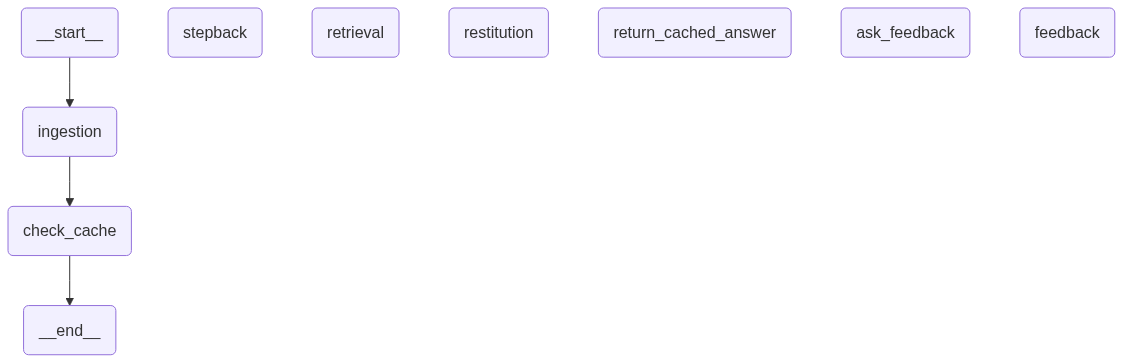

In [ ]:
from IPython.display import Image, display
display(Image(executor.get_graph().draw_mermaid_png()))

In [ ]:
query = "Comment un agent LangChain choisit-il dynamiquement quel outil appeler lors d'une interaction complexe avec plusieurs intentions utilisateur ?"
source = {"type": "web", "path": "https://langchain-ai.github.io/langgraph/tutorials/get-started/2-add-tools/#add-tools"}

result = executor.invoke(RAGState(query=query, sources=[source]))

if(result['cache_hit'] == True) :
  display("🔁 The query was stored in cache 🔁")
else:
  display("💬 Generated General Question:", result['multiple_queries'].general_question)
  display("🤔 Query Generation Reasoning:", result['multiple_queries'].reasoning)

print("📝 Final Answer:", result['answer'].answer)

Selected Configuration:
Model Type: openai
Model Name: gpt-4o-mini
Temperature: 0.3
Max Retries: 3
Selected Embedding Configuration:
Embedding Type: openai
Embedding Model: text-embedding-3-small


ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientStartEvent: capture() takes 1 positional argument but 3 were given
ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientCreateCollectionEvent: capture() takes 1 positional argument but 3 were given
ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event CollectionQueryEvent: capture() takes 1 positional argument but 3 were given
/tmp/ipython-input-12-2745340317.py:4: LangChainBetaWarning: The function `loads` is in beta. It is actively being worked on, so the API may change.
  return [loads(doc) for doc in unique_docs]


Selected Configuration:
Model Type: openai
Model Name: gpt-4o-mini
Temperature: 0.3
Max Retries: 3
💬 Réponse : answer="Un agent intelligent gère la sélection d'outils en définissant un graphe qui représente les différentes intentions des utilisateurs et les outils disponibles. Lorsqu'un utilisateur pose une question, l'agent évalue les intentions multiples en utilisant des conditions prédéfinies (conditional_edges) pour déterminer quel outil est le plus approprié à utiliser. De plus, l'agent peut être configuré pour ajouter des composants préconstruits et personnaliser l'état afin de mieux répondre aux besoins spécifiques des utilisateurs. Cela permet une interaction dynamique et efficace, où l'agent peut adapter ses réponses et ses actions en fonction des intentions détectées." sources=['Agent development', 'Workflows & agents', 'Prebuilt components']
📝 Entrez un feedback (ou laissez vide pour continuer) : 


'💬 Generated General Question:'

"Comment un agent intelligent gère-t-il la sélection d'outils en fonction des intentions multiples des utilisateurs ?"

'🤔 Query Generation Reasoning:'

"La question initiale se concentre sur un aspect spécifique de LangChain, mais elle peut être généralisée pour inclure d'autres systèmes d'agents intelligents qui doivent également gérer des interactions complexes et des intentions multiples."

📝 Final Answer: Un agent intelligent gère la sélection d'outils en définissant un graphe qui représente les différentes intentions des utilisateurs et les outils disponibles. Lorsqu'un utilisateur pose une question, l'agent évalue les intentions multiples en utilisant des conditions prédéfinies (conditional_edges) pour déterminer quel outil est le plus approprié à utiliser. De plus, l'agent peut être configuré pour ajouter des composants préconstruits et personnaliser l'état afin de mieux répondre aux besoins spécifiques des utilisateurs. Cela permet une interaction dynamique et efficace, où l'agent peut adapter ses réponses et ses actions en fonction des intentions détectées.


# HyDE et Wikipédia


Maintenant, nous allons utiliser un retriever basé sur Wikipedia pour récupérer des informations réelles après avoir généré un document hypothétique avec l'approche HyDE.

---
##🏗 Pourquoi utiliser Wikipedia comme Retriever ?

* ✅ Données riches et vérifiées : Wikipedia est une source fiable pour des faits et concepts.
* ✅ Large couverture : Idéal pour tester l’amélioration de la récupération d’information avec HyDE.
* ✅ Accès rapide : Via l’API LangChain, nous pouvons interroger Wikipedia efficacement.
---

## 🛠 Plan d'implémentation
* 1️⃣ Génération d’un document hypothétique avec un modèle de langage (HyDE).
* 2️⃣ Utilisation de Wikipedia Retriever pour chercher des documents correspondants à ce document.
* 3️⃣ Comparaison des résultats obtenus avec et sans HyDE.
* 4️⃣ Génération de la réponse finale en utilisant RAG.

In [ ]:
!pip install wikipedia

In [ ]:
from typing import List, Dict, Optional
from pydantic import BaseModel, Field
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_core.runnables import RunnablePassthrough
from langchain_core.retrievers import BaseRetriever
from langchain_core.documents import Document
from langchain_ollama import ChatOllama, OllamaEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.prompts import ChatPromptTemplate
from langgraph.graph import StateGraph
from operator import itemgetter
from langchain.load import dumps, loads
from functools import lru_cache
from diskcache import Cache
from langsmith import traceable, Client
import json

In [ ]:
from typing import TypedDict, List
from langchain_core.runnables import RunnableLambda
from langchain.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
from langchain.retrievers import WikipediaRetriever
from langchain.chains import RetrievalQA
from langchain_core.documents import Document # Import Document
from langchain.chains.combine_documents import create_stuff_documents_chain # Import create_stuff_documents_chain
from langchain.chains import create_retrieval_chain # Import create_retrieval_chain

# ----------- 🧠 State Definition -----------

class GraphState(TypedDict, total=False):
    question: str
    hypothetical_doc: str
    retrieved_hyde: List[Document] # Changed to List[Document]
    retrieved_direct: List[Document] # Changed to List[Document]
    final_answer: str
    use_hyde: bool
    show_docs: bool


# ----------- 🔧 Components -----------

llm = ChatOpenAI(temperature=0, api_key=OPENAI_API_KEY)
retriever = WikipediaRetriever()

template = """Rewrite the question into a more complete and more detailed question on the disscussed matter. Don't add extra words like 'Wikipedia' or quotes:
Question: {question}
Search Query:"""


prompt_hyde = ChatPromptTemplate.from_template(template)
hyde_chain = prompt_hyde | llm | StrOutputParser()

# 🔹 2. RAG Chain (Réutilisé plus tard)
# Define a simple prompt for the RAG chain
qa_prompt = ChatPromptTemplate.from_template("""Answer the following question based only on the provided context:
Context: {context}
Question: {question}
""")

# Create a document combining chain
combine_docs_chain = create_stuff_documents_chain(llm, qa_prompt)


# ----------- ⚙️ Functions -----------

def generate_hypothetical_doc(state: GraphState):
    hypo = hyde_chain.invoke({"question": state["question"]})
    print(f"\n🔹 Generated Search Query from HyDE: {hypo}\n")
    return {**state, "hypothetical_doc": hypo}

def print_documents(docs: List[Document], label: str):
    print(f"\n📚 {label} Documents Retrieved ({len(docs)} documents):")
    for i, doc in enumerate(docs, 1):
      print(f"\n--- Document {i} ---")
      print("Content Preview:", doc.page_content)
      if doc.metadata:
          print("Metadata:", doc.metadata)


def retrieve_with_hyde(state: GraphState):
    show_docs = state.get("show_docs", True)
    query = state["hypothetical_doc"]
    query = query.strip().strip('"').replace("Wikipedia", "").strip()
    print(f"🔹 Cleaned HyDE Query: {query}")
    docs = retriever.invoke(query)
    if show_docs:
        print_documents(docs, "HyDE")
    return {**state, "retrieved_hyde": docs}

def retrieve_direct(state: GraphState):
    show_docs = state.get("show_docs", True)
    docs = retriever.invoke(state["question"])
    if show_docs:
        print_documents(docs, "Direct")
    return {**state, "retrieved_direct": docs}



def compare_results(state: GraphState):
    len_hyde = len(state.get("retrieved_hyde", []))
    len_direct = len(state.get("retrieved_direct", []))
    print(f"📊 Wikipedia Results: HyDE = {len_hyde}, Direct = {len_direct}")
    return state

def generate_final_answer(state: GraphState):
    label = "RAG + HyDE" if state.get("use_hyde") else "Direct RAG"

    if state.get("use_hyde"):
        # Use retrieved documents from HyDE
        response = combine_docs_chain.invoke({"question": state["question"], "context": state["retrieved_hyde"]})
    else:
        # Use retrieved documents from direct retrieval
        response = combine_docs_chain.invoke({"question": state["question"], "context": state["retrieved_direct"]})


    print(f"\n🧠 Final Answer ({label}):\n{response}")
    return {**state, "final_answer": response}



---

In [ ]:
# Graph WITH HyDE

builder_hyde = StateGraph(GraphState)
builder_hyde.add_node("generate_hypothetical_doc", RunnableLambda(generate_hypothetical_doc))
builder_hyde.add_node("retrieve_with_hyde", RunnableLambda(retrieve_with_hyde))
builder_hyde.add_node("retrieve_direct", RunnableLambda(retrieve_direct))
builder_hyde.add_node("compare_results", RunnableLambda(compare_results))
builder_hyde.add_node("generate_final_answer", RunnableLambda(generate_final_answer))

builder_hyde.set_entry_point("generate_hypothetical_doc")
builder_hyde.add_edge("generate_hypothetical_doc", "retrieve_with_hyde")
builder_hyde.add_edge("retrieve_with_hyde", "retrieve_direct")
builder_hyde.add_edge("retrieve_direct", "compare_results")
builder_hyde.add_edge("compare_results", "generate_final_answer")
builder_hyde.add_edge("generate_final_answer", '__end__')

graph_hyde = builder_hyde.compile()


In [ ]:
# Graph WITHOUT HyDE
builder_direct = StateGraph(GraphState)
builder_direct.add_node("retrieve_direct", RunnableLambda(retrieve_direct))
builder_direct.add_node("generate_final_answer", RunnableLambda(generate_final_answer))

builder_direct.set_entry_point("retrieve_direct")
builder_direct.add_edge("retrieve_direct", "generate_final_answer")
builder_direct.add_edge("generate_final_answer", '__end__')

graph_direct = builder_direct.compile()

In [ ]:
test_questions = [
    "What are the basic rules of chess and how does each piece move?",
    "What strategies can beginners use to improve their chess game?",
    "What are common checkmate patterns every player should know?",
]

for question in test_questions:
    print(f"\n=== Testing question: {question} ===\n")

    state = GraphState(question=question, use_hyde=True, show_docs=False)
    result_hyde = graph_hyde.invoke(state)

    state = GraphState(question=question, use_hyde=False, show_docs=False)
    result_direct = graph_direct.invoke(state)



=== Testing question: What are the basic rules of chess and how does each piece move? ===


🔹 Generated Search Query from HyDE: What are the fundamental rules of chess, including how each individual piece moves on the board?

🔹 Cleaned HyDE Query: What are the fundamental rules of chess, including how each individual piece moves on the board?
📊 Wikipedia Results: HyDE = 3, Direct = 3

🧠 Final Answer (RAG + HyDE):
The basic rules of chess involve moving pieces on a board with the goal of checkmating the opponent's king. Each piece has its own unique way of moving:

1. Pawn: Pawns move forward one square, but capture diagonally. On their first move, pawns have the option to move two squares forward. Pawns can also promote to any other piece (except a king) if they reach the opponent's back rank.

2. Rook: Rooks move horizontally or vertically as many squares as they want.

3. Knight: Knights move in an L-shape, two squares in one direction and then one square perpendicular to that.

4. 

## Comparaison et Analyse des résultats

### Analyse question par question

##### "What are the basic rules of chess and how does each piece move?"

* Avec HyDE :

La requête générée est plus détaillée et précise, avec une formulation enrichie :
« What are the fundamental rules of chess, including how each individual piece moves on the board? »

La réponse finale est claire, complète et bien structurée, avec des explications spécifiques pour chaque pièce et des mentions importantes (promotion des pions, impossibilité de déplacer le roi en échec).

 * Sans HyDE (direct) :

La requête initiale est utilisée telle quelle, plus simple.

La réponse est aussi complète, même un peu plus longue, ajoutant la composition initiale des pièces.

L’explication reste détaillée, mais légèrement plus générique, moins fluide.

* Pertinence & Qualité :

Les deux réponses sont pertinentes et exactes. HyDE permet d’affiner la requête et d’obtenir un texte plus fluide, focalisé et bien organisé. Sans HyDE, la réponse est correcte mais un peu plus brute.

---

##### "What strategies can beginners use to improve their chess game?"

* Avec HyDE :

La requête est reformulée vers « stratégies efficaces pour débutants ».

La réponse est concise, claire, avec une bonne synthèse des conseils essentiels : pratique, étude des tactiques, analyse, jeu contre plus forts, apprentissage des concepts clés (centre, structure de pions).

* Sans HyDE (direct) :

La réponse est plus détaillée, liste dix conseils précis allant de l’étude des ouvertures à l’analyse des parties et au recours aux logiciels.

Plus exhaustive, mais potentiellement moins accessible pour un débutant absolu.

* Pertinence & Qualité :

La réponse avec HyDE privilégie la simplicité et la clarté, adaptée à un débutant qui cherche un bon point de départ. La réponse directe est plus complète, utile pour un utilisateur recherchant une liste exhaustive. L’usage de HyDE oriente donc la génération vers une réponse plus ciblée.

---

##### "What are common checkmate patterns every player should know?"

* Avec HyDE :
La requête reformulée cible directement les motifs de mat.

La réponse énumère 10 motifs de mat spécifiques, donnant des noms connus et reconnus dans la communauté échiquéenne (Back rank mate, Anastasia’s mate, etc.).

* Sans HyDE (direct) :

La réponse est plus courte et mentionne seulement 3 motifs (Back rank, smothered, two-rook).

Moins complète et moins variée.

* Pertinence & Qualité :

La réponse HyDE est clairement plus riche, donnant un panorama plus large des motifs de mat. La reformulation améliore la qualité et la richesse du contenu récupéré et généré.


## Analyse globale et conclusions

* Avantages de HyDE :

Génération automatique de requêtes plus précises et naturelles qui capturent mieux l’intention de la question.

Recherche d’informations plus ciblée dans Wikipedia, ce qui améliore la qualité et la richesse des extraits.

Réponses finales mieux structurées, plus complètes et pertinentes, souvent plus fluides et synthétiques.

* Limites sans HyDE :

Le retriever traite la question brute, parfois trop simple ou vague, ce qui peut conduire à des résultats moins optimaux.

Réponses plus brutes, parfois moins bien organisées ou moins exhaustives.

* Pertinence du RAG avec HyDE :

RAG s’appuie sur un corpus récupéré plus pertinent, ce qui améliore la génération.

Les réponses sont plus factuelles, adaptées au contexte de la question, et plus détaillées.

HyDE agit comme un « reformulateur » améliorant la phase de récupération d’information.


# Semantic Routing

In [76]:
from typing import TypedDict
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

class RoutingState(TypedDict, total=False):
    query: str
    selected_prompt: str
    confirmed_prompt: str
    user_choice: str
    final_answer: str



In [97]:
llm = ChatOpenAI(temperature=0, api_key=OPENAI_API_KEY)
embeddings = OpenAIEmbeddings(api_key=OPENAI_API_KEY)

archaeologist_template = """Vous êtes un archéologue renommé spécialisé dans les civilisations anciennes.
Vous répondez aux questions sur l'histoire, les sites archéologiques, et les découvertes historiques avec des explications précises et fascinantes.
Si la question ne fait pas partie de votre spécialité ou est hors sujet, vous répondrez "Je ne sais pas" sans explication détaillée.

Voici une question :
{query}"""

doctor_template = """Vous êtes un médecin expert en biologie et en santé.
Vous donnez des explications détaillées sur les maladies, les traitements et le fonctionnement du corps humain.
Vous basez vos réponses sur des faits scientifiques et des études médicales reconnues.
Si la question ne fait pas partie de votre spécialité ou est hors sujet, vous répondrez "Je ne sais pas" sans explication détaillée.
Voici une question :
{query}"""

ai_engineer_template = """Vous êtes un ingénieur en intelligence artificielle et en automatisation.
Vous êtes spécialisé dans les réseaux de neurones, l'apprentissage automatique et les modèles de langage.
Vous expliquez les concepts d’IA de manière claire et pédagogique.
Si la question ne fait pas partie de votre spécialité ou est hors sujet, vous répondrez "Je ne sais pas" sans explication détaillée.
Voici une question :
{query}"""

prompt_templates = [archaeologist_template, doctor_template, ai_engineer_template]
expert_names = ["archaeologist", "doctor", "ai_engineer"]
prompt_embeddings = embeddings.embed_documents(prompt_templates)

prompt_name_map = {
    archaeologist_template: "archaeologist",
    doctor_template: "doctor",
    ai_engineer_template: "ai_engineer"
}

In [98]:
def route_expert(state: RoutingState) -> RoutingState:
    query = state["query"]
    query_embedding = embeddings.embed_query(query)

    similarity_scores = cosine_similarity([query_embedding], prompt_embeddings)[0]
    ranked_indices = np.argsort(similarity_scores)[::-1]
    best_idx, second_idx = ranked_indices[0], ranked_indices[1]
    top1_score, top2_score = similarity_scores[best_idx], similarity_scores[second_idx]
    top1_prompt = prompt_templates[best_idx]
    top2_prompt = prompt_templates[second_idx]

    for i, score in enumerate(similarity_scores):
      print(f"🔎 {prompt_name_map[prompt_templates[i]]}: {score:.4f}")

    print(f"\n🔍 Similarité max : {top1_score:.4f} | 2e plus proche : {top2_score:.4f}")
    top2_diff = abs(top1_score - top2_score)

    if top2_diff < 0.01:
        print("👥 Plusieurs experts semblent pertinents pour cette question :")
        print(f"  1️⃣ {prompt_name_map[top1_prompt]} (score: {top1_score:.4f})")
        print(f"  2️⃣ {prompt_name_map[top2_prompt]} (score: {top2_score:.4f})")
        print("Vous pourrez choisir entre les deux à l'étape suivante.")
        suggested_prompt = top1_prompt
        state = {
            **state,
            "selected_prompt": suggested_prompt,
            "alt_prompt": top2_prompt,
            "is_interdisciplinary": True,
        }
    else:
        print(f"✅ Expert sélectionné automatiquement : {prompt_name_map[top1_prompt]}")
        state = {
            **state,
            "selected_prompt": top1_prompt,
            "is_interdisciplinary": False,
        }

    return state


In [92]:
def user_affinage(state: RoutingState) -> RoutingState:
    if state.get("is_interdisciplinary", False):
        prompt1 = state["selected_prompt"]
        prompt2 = state["alt_prompt"]

        print("\n👥 Deux experts sont proches :")
        print(f"  1️⃣ {prompt_name_map[prompt1]}")
        print(f"  2️⃣ {prompt_name_map[prompt2]}")
        print("Choisissez celui que vous préférez (1 ou 2), ou tapez autre nom d’expert manuellement.")
        print("Tapez 'auto' pour garder le 1er automatiquement.")

        user_input = input("👉 Votre choix : ").strip().lower()

        if user_input == "1" or user_input == "auto":
            confirmed_prompt = prompt1
        elif user_input == "2":
            confirmed_prompt = prompt2
        elif user_input in prompt_name_map.values():
            for p in prompt_templates:
                if prompt_name_map[p] == user_input:
                    confirmed_prompt = p
                    break
            else:
                print("⚠️ Entrée invalide, expert automatique conservé.")
                confirmed_prompt = prompt1
        else:
            print("⚠️ Entrée invalide, expert automatique conservé.")
            confirmed_prompt = prompt1

    else:
        selected_prompt = state["selected_prompt"]
        selected_name = prompt_name_map[selected_prompt]
        print(f"\n🤖 L'expert sélectionné automatiquement est : {selected_name}")
        print("Souhaitez-vous le confirmer ou choisir un autre expert ?")
        print("Options : auto / doctor / ai_engineer / archaeologist")
        user_input = input("👉 Votre choix : ").strip().lower()

        if user_input == "auto" or user_input == selected_name:
            confirmed_prompt = selected_prompt
        else:
            for p in prompt_templates:
                if prompt_name_map[p] == user_input:
                    confirmed_prompt = p
                    break
            else:
                print("⚠️ Entrée invalide, expert automatique conservé.")
                confirmed_prompt = selected_prompt

    print(f"✅ Expert confirmé : {prompt_name_map[confirmed_prompt]}")
    return {**state, "confirmed_prompt": confirmed_prompt, "user_choice": user_input}


In [99]:
def confirm_expert(state: RoutingState) -> RoutingState:
    confirmed = state["selected_prompt"]
    print(f"✅ Expert confirmé : {prompt_name_map[confirmed]}")
    return {**state, "confirmed_prompt": confirmed}


In [94]:
def generate_response(state: RoutingState) -> RoutingState:
    prompt_template = PromptTemplate.from_template(state["confirmed_prompt"])
    chain = prompt_template | llm | StrOutputParser()
    answer = chain.invoke({"query": state["query"]})

    print(f"🧠 Réponse générée :\n{answer}")
    return {**state, "final_answer": answer}


In [95]:
from langchain_core.runnables import RunnableLambda

builder = StateGraph(RoutingState)

builder.add_node("route_expert", RunnableLambda(route_expert))
builder.add_node("user_affinage", RunnableLambda(user_affinage))
builder.add_node("generate_response", RunnableLambda(generate_response))

builder.set_entry_point("route_expert")
builder.add_edge("route_expert", "user_affinage")
builder.add_edge("user_affinage", "generate_response")
builder.add_edge("generate_response", "__end__")

graph_with_affinage = builder.compile()


In [96]:
test_questions = [
    "Comment l’intelligence artificielle influence-t-elle la médecine moderne ?",
    "Quelles sont les grandes découvertes de l'Égypte antique ?",
    "Quels sont les effets secondaires du vaccin contre la grippe ?",
    "Quels sont les avantages de l’apprentissage profond dans le traitement du langage naturel ?",
]

for question in test_questions:
    print(f"\n=== Question: {question} ===\n")
    state = RoutingState(query=question)
    result = graph_with_affinage.invoke(state)



=== Question: Comment l’intelligence artificielle influence-t-elle la médecine moderne ? ===

🔎 archaeologist: 0.7592
🔎 doctor: 0.8016
🔎 ai_engineer: 0.8115

🔍 Similarité max : 0.8115 | 2e plus proche : 0.8016
👥 Plusieurs experts semblent pertinents pour cette question :
  1️⃣ ai_engineer (score: 0.8115)
  2️⃣ doctor (score: 0.8016)
Vous pourrez choisir entre les deux à l'étape suivante.

🤖 L'expert sélectionné automatiquement est : ai_engineer
Souhaitez-vous le confirmer ou choisir un autre expert ?
Options : auto / doctor / ai_engineer / archaeologist
👉 Votre choix : ai_engineer
✅ Expert confirmé : ai_engineer
🧠 Réponse générée :
L'intelligence artificielle a un impact significatif sur la médecine moderne en permettant des avancées majeures dans de nombreux domaines. Par exemple, les réseaux de neurones peuvent être utilisés pour analyser de grandes quantités de données médicales et identifier des schémas ou des corrélations qui échapperaient à l'œil humain. Cela peut aider les méde

## 📊 Comparaison des résultats selon les questions

### 1. Question : Comment l’intelligence artificielle influence-t-elle la médecine moderne ?
Scores :
```plaintext
ai_engineer: 0.8115
doctor: 0.8016
archaeologist: 0.7592
```
- Observation : L’écart entre les deux meilleurs experts est très faible (~0.01), ce qui reflète bien la nature interdisciplinaire de la question.
- Résultat : Le système a correctement détecté deux domaines pertinents, et a proposé un choix.
- Choix utilisateur : ai_engineer
- Réponse générée : Précise, complète, bien orientée IA + santé


---


### 2. Question : Quelles sont les grandes découvertes de l’Égypte antique ?
Scores :
```plaintext
archaeologist: 0.8075
doctor: 0.7513
ai_engineer: 0.7401
```
- Observation : L’écart reste significatif, pas de cas interdisciplinaire détecté.
- Choix utilisateur : doctor (mauvais choix)
- Réponse générée : L’agent médecin ne sait pas répondre → il rejette la requête de l'utilisateur


---


### 3. Question : Quels sont les effets secondaires du vaccin contre la grippe ?
Scores :
```plaintext
doctor: 0.7559
ai_engineer: 0.7251
archaeologist: 0.7186
```
- Observation : Le domaine est clairement médical, pas d’ambiguïté.
- Choix utilisateur : doctor
- Réponse générée : Complète, précise, adaptée à la question.


---


### 4. Question : Quels sont les avantages de l’apprentissage profond dans le traitement du langage naturel ?
Scores :
```plaintext
ai_engineer: 0.7917
doctor: 0.7748
archaeologist: 0.7662
```
- Observation : L’écart est modéré, mais l’IA reste clairement plus pertinente.
- Choix utilisateur : auto
- Réponse générée : Très adaptée à la question, centrée sur le deep learning.



## 💡 Réflexion sur l’impact du routage sémantique

###✅ Points forts
- Pertinence accrue des réponses

- En dirigeant automatiquement les questions vers l’expert le plus adapté, on réduit les erreurs de compréhension du domaine.

- L’expert médecin ne répond plus aux questions sur les pyramides, par exemple.

- Gestion efficace des cas interdisciplinaires

- L’algorithme détecte des cas où plusieurs experts peuvent être légitimes (ex : IA + médecine).

- Le système propose un choix à l'utilisateur ou peut fusionner les réponses.

- Personnalisation dynamique

- L'utilisateur peut ajuster ou valider la sélection, ce qui permet un contrôle sans sacrifier l'automatisation.

- Évolutivité naturelle

- On peut facilement ajouter de nouveaux experts avec leurs prompts, sans modifier le pipeline.

### ⚠️ Limites et pistes d’amélioration

- Choix utilisateur incorrect possible

- Seuil d’interdisciplinarité fixe :

Le seuil 0.01 peut être trop rigide. Une meilleure approche serait d’utiliser un seuil dynamique, ou même de toujours proposer les deux meilleurs scores si les deux sont > 0.78, par exemple.

- Fusion de réponses (option avancée) :

Pour les cas IA + médecine, il serait utile de générer une réponse collaborative à partir des deux prompts.


## ✍️ Conclusion
Le routage sémantique permet d'améliorer considérablement la précision, la pertinence et la flexibilité des réponses dans un système de question/réponse basé sur des experts virtuels. En intégrant une phase d'affinage et une gestion des cas interdisciplinaires, le système devient à la fois intelligent et interactif — ce qui constitue un pas décisif vers des assistants IA réellement spécialisés et adaptatifs.